In [4]:
# Load necessary libraries
library(pROC)
library(PRROC)
library(tidyverse)

Type 'citation("pROC")' for a citation.


Caricamento pacchetto: ‘pROC’


I seguenti oggetti sono mascherati da ‘package:stats’:

    cov, smooth, var


── Attaching core tidyverse packages ────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
# Load the dataset from the data folder
setwd("../data")
iris.data <- read.csv("iris.data.txt", header = TRUE)

# Filter out the "Iris-setosa" class to create a binary classification problem
iris.datalog <- iris.data[iris.data$class != "Iris-setosa", ]

# Transform the 'class' variable into a binary variable
# 1 for "Iris-versicolor", 0 for other classes
iris.datalog$class_binaria <- ifelse(iris.datalog$class == "Iris-versicolor", 1, 0)

# Rename variables for clarity
names(iris.datalog)[names(iris.datalog) == "sepalenght"] <- "sl"
names(iris.datalog)[names(iris.datalog) == "petalenght"] <- "pl"
names(iris.datalog)[names(iris.datalog) == "sepalwidth"] <- "sw"
names(iris.datalog)[names(iris.datalog) == "petalwidth"] <- "pw"

In [14]:
# Fit a refined logistic regression model with selected predictors
model2 <- glm(class_binaria ~ sw + pl + pw, data = iris.datalog, family = "binomial")
summary(model2)
# Results: AIC = 21.266, NULL DEVIANCE = 138.629, RESIDUAL DEVIANCE = 13.266 (improvement)

Warning message:
“glm.fit: si sono verificate probabilità stimate numericamente pari a 0 o 1”



Call:
glm(formula = class_binaria ~ sw + pl + pw, family = "binomial", 
    data = iris.datalog)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)   50.527     23.995   2.106   0.0352 *
sw             8.376      4.761   1.759   0.0785 .
pl            -7.875      3.841  -2.050   0.0403 *
pw           -21.430     10.707  -2.001   0.0453 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 138.629  on 99  degrees of freedom
Residual deviance:  13.266  on 96  degrees of freedom
AIC: 21.266

Number of Fisher Scoring iterations: 10


In [16]:
# After verifying the model, proceed to adjust the classification threshold
# Choose a lower threshold to minimize error, as the optimal threshold is unknown

threshold = 0.1

# Actual values (ground truth)
true_values = iris.datalog$class_binaria

# Predicted values based on the chosen threshold
predicted_values = as.numeric(model2$fitted.values > threshold)  # 1 if > threshold, 0 otherwise

# Confusion matrix
confusion_matrix = table(true_values, predicted_values)
confusion_matrix

           predicted_values
true_values  0  1
          0 45  5
          1  0 50

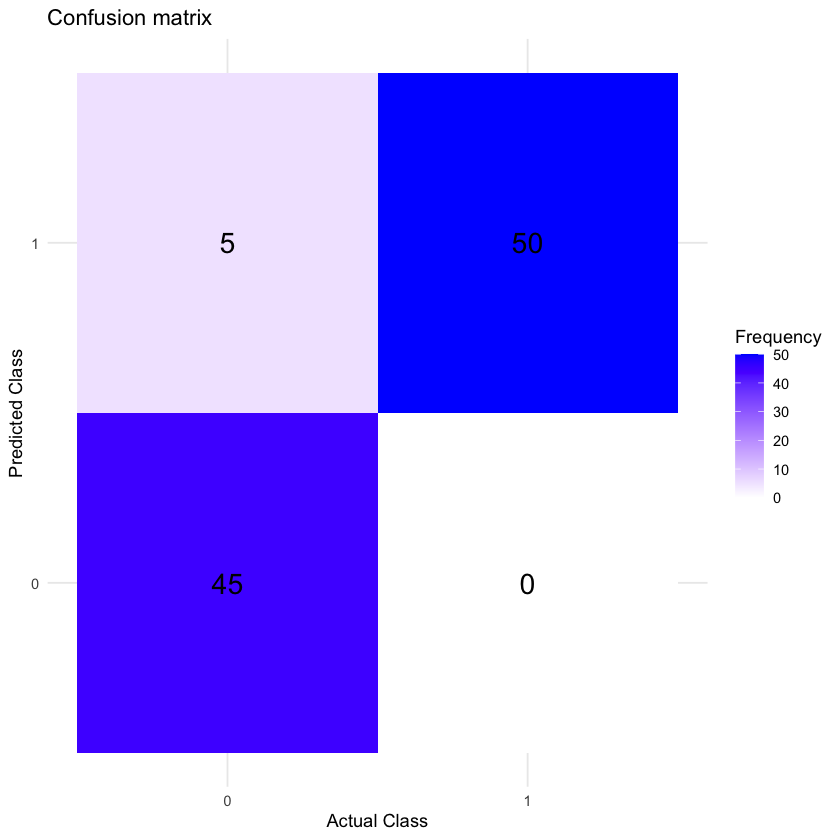

In [20]:
# Creiamo un dataframe per la heatmap
confusion_df <- as.data.frame(confusion_matrix)
colnames(confusion_df) <- c("Actual", "Prediction", "Frequency")

# Visualizza la heatmap
ggplot(confusion_df, aes(x = Actual, y = Prediction, fill = Frequency)) +
  geom_tile() +
  geom_text(aes(label = Frequency), color = "black", size = 6) +
  scale_fill_gradient(low = "white", high = "blue") +
  labs(title = "Confusion matrix", x = "Actual Class", y = "Predicted Class") +
  theme_minimal()

[1] 0.95

[1] 0.05

[1] 1

[1] 0.9

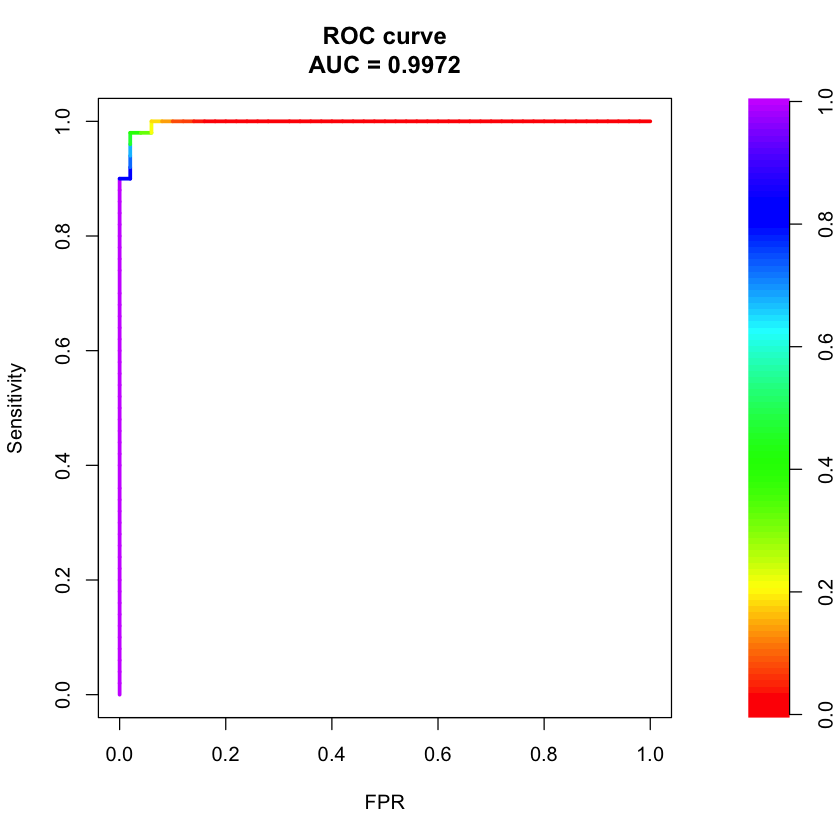

In [22]:
# The confusion matrix contains:
# - True Positives (TP): 1s classified as 1s
# - True Negatives (TN): 0s classified as 0s
# - False Positives (FP): 0s classified as 1s
# - False Negatives (FN): 1s classified as 0s

# Calculate misclassification error to minimize it

# Performance metrics:
# Accuracy: Percentage of correctly classified cases
accuracy = round(sum(diag(confusion_matrix)) / sum(confusion_matrix), 2)
accuracy

# Misclassification rate: Percentage of incorrectly classified cases
misclassification_rate = round((confusion_matrix[1, 2] + confusion_matrix[2, 1]) / sum(confusion_matrix), 2)
misclassification_rate

# Sensitivity (True Positive Rate)
sensitivity = confusion_matrix[2, 2] / (confusion_matrix[2, 1] + confusion_matrix[2, 2])
sensitivity

# Specificity (True Negative Rate)
specificity = confusion_matrix[1, 1] / (confusion_matrix[1, 2] + confusion_matrix[1, 1])
specificity

# Use the ROC curve to select the best threshold
fit2 = model2$fitted.values

PRROC_obj <- roc.curve(scores.class0 = fit2, weights.class0 = as.numeric(iris.datalog$class_binaria), curve = TRUE)
plot(PRROC_obj)

# From the ROC plot, observe that the curve is nearly optimal
# The threshold of 0.1 can be kept as it minimizes error